<a href="https://colab.research.google.com/github/kaleab-desciple/Machine_Learning_with_sckilet/blob/main/Chapter2_ML_book_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
      housing_tarball.extractall(path="datasets")
  return pd.read_csv(Path("datasets/housing/housing.csv"))
housing = load_housing_data()

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


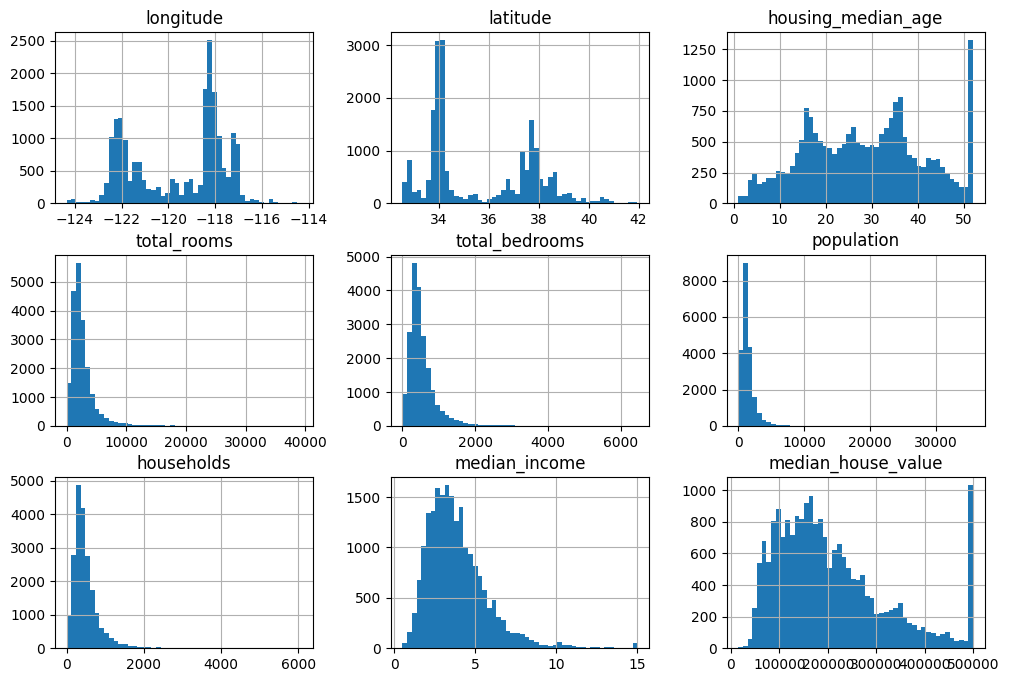

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(12, 8))
plt.show()

## **Splitting data**

In [4]:
from sklearn.model_selection import train_test_split # random spliting of the dataset
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2,
random_state=42)

In [ ]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.22,32.75,34.0,6001.0,1111.0,2654.0,1072.0,4.5878,291000.0,NEAR OCEAN
8267,-117.03,32.69,10.0,901.0,163.0,698.0,167.0,4.6648,156100.0,NEAR OCEAN
17445,-122.27,37.74,28.0,6909.0,1554.0,2974.0,1484.0,3.6875,353900.0,NEAR BAY
14265,-121.82,37.25,25.0,4021.0,634.0,2178.0,650.0,5.1663,241200.0,<1H OCEAN
2271,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,53800.0,INLAND


In [5]:
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],
  bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
  labels=[1, 2, 3, 4, 5])

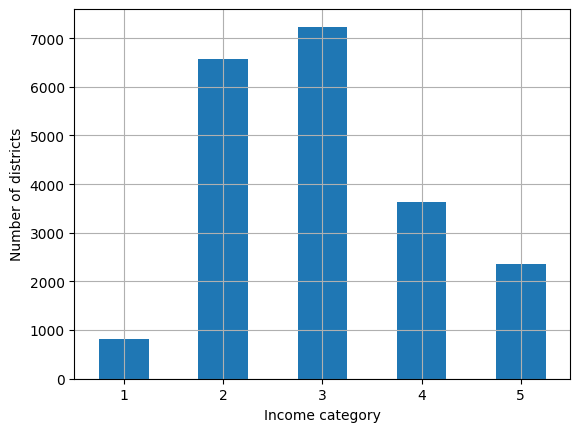

In [6]:
import matplotlib.pyplot as plt
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit # stratified sampling of dataset
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
  strat_train_set= housing.iloc[train_index]
  strat_test_set = housing.iloc[test_index]
  strat_splits.append([strat_train_set, strat_test_set])

In [8]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [9]:
for data_set in (strat_train_set, strat_test_set): # removing "income_cat"  from  strat_train_set, strat_test_set
  data_set.drop("income_cat", axis=1, inplace=True)

<ipython-input-9-1acbb863ee09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set.drop("income_cat", axis=1, inplace=True)
<ipython-input-9-1acbb863ee09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set.drop("income_cat", axis=1, inplace=True)


## **visualizing data**



In [10]:
housing = strat_train_set.copy() # first copy the original data

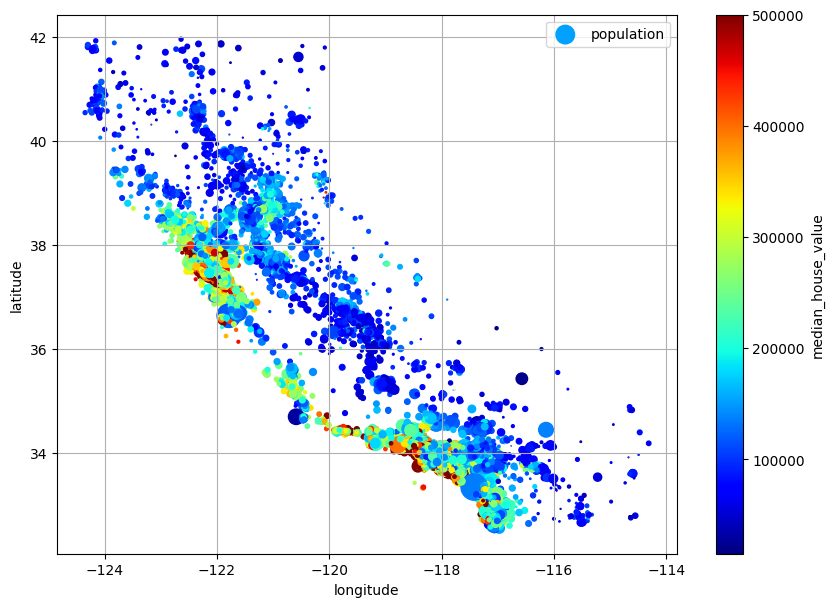

In [ ]:
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

## **look for corelations**

In [11]:
corr_matrix = housing.corr(numeric_only=True)

In [12]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.690521
total_rooms,0.138451
housing_median_age,0.100461
households,0.068652
total_bedrooms,0.053506
population,-0.021435
longitude,-0.041398
latitude,-0.148153


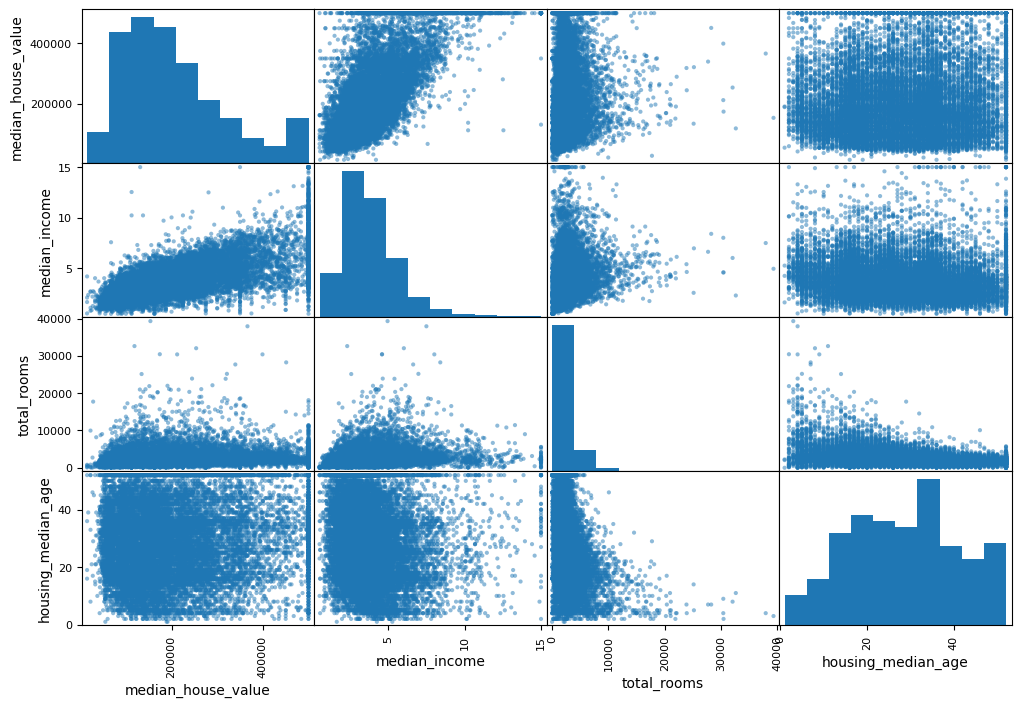

In [13]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

## **try find new/derived attributes**

In [14]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]

housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]

housing["people_per_house"] = housing["population"] / housing["households"]

## **clean/prepare data for the algorithm**

In [15]:
# copy train_set without "median_house_value"
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()  #METHOD-2

In [16]:
# create copy of the original data
housing_option2 = housing.copy()
# housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # option 2

In [17]:
# create a copy of the data with only the numerical attributes
housing_num = housing.select_dtypes(include=[np.number])

In [18]:
#  fill missing feature with the mean value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # strategy can also be "most frequent","constant"
imputer.fit(housing_num)
X = imputer.transform(housing_num)

In [19]:
# recover/preserve the column names and index
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

## **Handling Text and Categorical Attributes**

In [20]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[["ocean_proximity"]]

cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [21]:
 housing_cat.head()

,ocean_proximity
19887,INLAND
9051,<1H OCEAN
2502,NEAR BAY
19903,INLAND
6129,INLAND


In [22]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [ ]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [ ]:
# df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
#                        columns=cat_encoder.get_feature_names_out(),
#                         index=df_test_unknown.index)



In [23]:
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [24]:
from sklearn.pipeline import make_pipeline
cat_pipeline = make_pipeline(
SimpleImputer(strategy="most_frequent"),
OneHotEncoder(handle_unknown="ignore"))

## **Feature Scaling and transformation**

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector
from sklearn.preprocessing import FunctionTransformer
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [26]:
from sklearn.metrics.pairwise import rbf_kernel
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 24)

In [ ]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [27]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
index=housing_num.index)


In [28]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e0...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e0c4818e290>)])),
                ('linearregression', LinearRegression())])

In [29]:
housing_predictions = lin_reg.predict(housing)

In [ ]:
housing_labels.head()

19887    152400.0
9051     166300.0
2502     455400.0
19903    341700.0
6129     198500.0
Name: median_house_value, dtype: float64

In [ ]:
 housing_labels.iloc[:5].values

array([152400., 166300., 455400., 341700., 198500.])

In [ ]:
housing_predictions[:5].round(-2)

array([222200., 159800., 307000., 287900., 117000.])

In [30]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
lin_rmse

69225.09276965357

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e0...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e0c4818e290>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [32]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)
tree_rmse

0.0

In [36]:
# random forests is better for this task
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
forest_reg = make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, housing, housing_labels,scoring="neg_root_mean_squared_error", cv=10)

In [37]:
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,46793.722158
std,1808.833916
min,43288.653258
25%,45990.182686
50%,46862.466629
75%,47702.145566
max,49849.219679


In [40]:
# hyperparameter tuning by using "Random Search Cross validation"
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint

full_pipeline = Pipeline([
("preprocessing", preprocessing),
("random_forest", RandomForestRegressor(random_state=42)),
])
param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),'random_forest__max_features': randint(low=2, high=20)}
rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,scoring='neg_root_mean_squared_error', random_state=42)
rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e0c4806f9a0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e0c4806da80>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [43]:
# the relative importance of each attribute for making accurate predictions

final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)


array([0.07, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.01,
       0.  , 0.01, 0.01, 0.01, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.02, 0.02, 0.01, 0.  , 0.01, 0.01, 0.  , 0.02,
       0.  , 0.02, 0.01, 0.  , 0.01, 0.01, 0.03, 0.02, 0.01, 0.01, 0.08,
       0.  , 0.  , 0.  , 0.01])

In [44]:
sorted(zip(feature_importances,
... final_model["preprocessing"].get_feature_names_out()),
... reverse=True)

[(0.18727670699849927, 'log__median_income'),
 (0.0756888129233996, 'cat__ocean_proximity_INLAND'),
 (0.06888183711063874, 'bedrooms__ratio'),
 (0.05800128668049929, 'rooms_per_house__ratio'),
 (0.04937509428683021, 'people_per_house__ratio'),
 (0.03343882721185608, 'geo__Cluster 42 similarity'),
 (0.02348857039734534, 'geo__Cluster 29 similarity'),
 (0.021160379038079782, 'geo__Cluster 28 similarity'),
 (0.0206884426888294, 'geo__Cluster 19 similarity'),
 (0.0197845106253747, 'geo__Cluster 43 similarity'),
 (0.019385351508184424, 'geo__Cluster 3 similarity'),
 (0.019214429774622562, 'geo__Cluster 18 similarity'),
 (0.018955945994936305, 'geo__Cluster 12 similarity'),
 (0.015757273279329114, 'geo__Cluster 35 similarity'),
 (0.015305315599570926, 'geo__Cluster 37 similarity'),
 (0.013281849756680075, 'geo__Cluster 23 similarity'),
 (0.012985710527891792, 'geo__Cluster 15 similarity'),
 (0.012895282270319013, 'geo__Cluster 2 similarity'),
 (0.012872578991093593, 'geo__Cluster 22 similari

In [45]:
# Evaluate Your System on the Test Set

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
final_predictions = final_model.predict(X_test)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

42198.42266648691
